# Generating figures in Haque, Cetiner, Gunawardena 2024

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from steinberg_utils_3vertex import *

# Plot features

In [4]:
# plot formatting
plt.rc("text", usetex=False)
plt.rc("font", family = "serif",size=14)
plt.rc("figure",figsize=(14,12))
%config InlineBackend.figure_format = 'retina'

In [5]:
# hex codes

# strawberry pink (A^{13})
strawberrypink = '#FF3D6E'

# super lime green (A^{31})
superlime = '#DBF711'

# orangered (highlight)
orangered = '#FD5500'

# teal/turquoise (graph node color)
brightturquoise = '#1CB1B5'

# brighter salmon pink (detailed balance box color)
brightersalmonpink = '#D9718E'

# indigo (poster background)
deepindigo = '#310082'

# duller orange (idk)
dullerorange = '#DD5734'

# duller turquoise (blue green viridian)
brighterturquoise = '#00AB8E'

# one more turquoise (graph nodes in presentation abstract)
viridian = '#4CA98F'

# one more turquoise (graph nodes in presentation abstract)
mango = '#FFA400'

# sky blue
skyblue = '#4599DF'

# bright blue
brightblue = '#0169f4'

# gold
gold = '#e69a0e'

#mint
mint = '#80d9bb'

# what is this color
what = '#4599DF'

# Plotting higher-order autocorrelation functions $\mathcal{A}^{1,3}(\tau)$ and $\mathcal{A}^{3,1}(\tau)$

Let us define the values of our stochastic signal $f(t)$. Recall that $f(t)$ takes one of the values $S(1), S(2), S(3)$ when the system occupies state $1$, $2$, or $3$, respectively. Here we also take $\alpha = 1$ and $\beta = 3$.

In [6]:
signal = [3, 5, 7]
alpha = 1
beta = 3

![My Image](steinberg_figure_1.png)

First, we must assign values for the edge labels of the 3-vertex graph. The parameters for the 3-vertex graph are listed in the following order: $[a, b, d, c, f, e]$

In [7]:
params = [0.00206, 2.69641, 0.2113, 0.58195, 0.35186, 0.0015]

The cycle affinity quantifies the departure from equilibrium that arises from the cycle $C$.

In [10]:
cycle_affinity_K(params)

13.647844424688195

Next, we compute the Laplacian matrix for this graph with this specific parameterzation.

In [11]:
L = Laplacian_K(params)
print(L)

[[-3.53920e-01  2.69641e+00  1.50000e-03]
 [ 2.06000e-03 -2.90771e+00  5.81950e-01]
 [ 3.51860e-01  2.11300e-01 -5.83450e-01]]


Set a range for the $\tau$ values -- this range can be altered depending on the shape of the autocorrelation functions.

In [12]:
tau = np.around(np.arange(0.01,4.0,step=.01), decimals = 2)

In [14]:
a_13, a_31 = autocorrelation_analytical(signal,L,tau,alpha,beta)

In [15]:
# numerical area
np.abs(np.trapz(t)-np.trapz(t_rev))

1634.4749826598267077

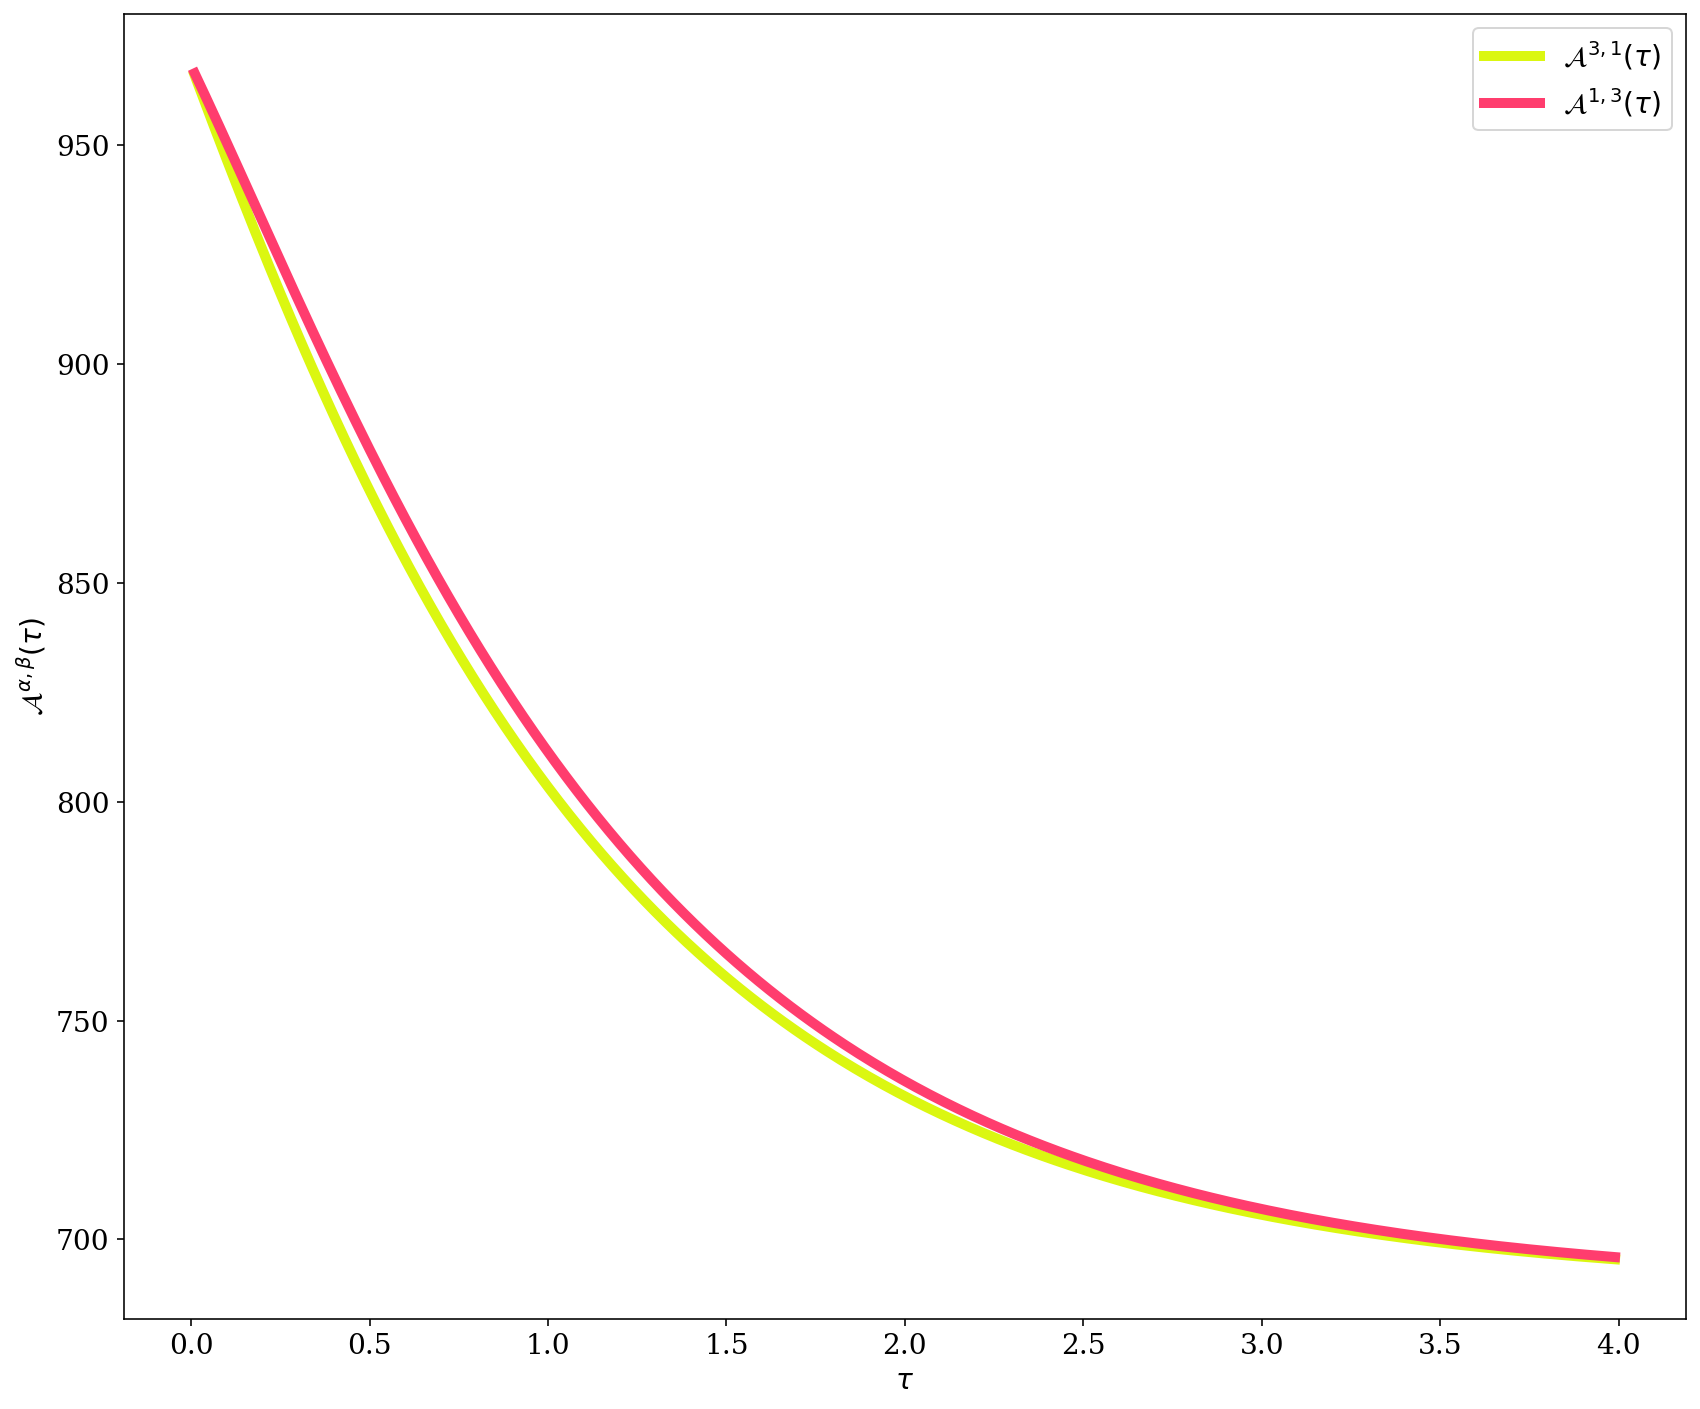

In [18]:
fig = plt.figure()
plt.plot(tau,a_13,label=r'$\mathcal{A}^{3,1}(\tau)$',linewidth=5, c= superlime)
plt.plot(tau,a_31,label=r'$\mathcal{A}^{1,3}(\tau)$',linewidth=5,color=strawberrypink)
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\mathcal{A}^{\alpha,\beta}(\tau)$")
plt.legend()
plt.show()
fig.savefig('figure_3A_legend.pdf', dpi = 900, bbox_inches='tight',facecolor=fig.get_facecolor(), edgecolor='none')

# The Steinberg signature's sensitivity to entropy production. Does it matter which parameter is selected to vary?

Define the starting parameters for K.

In [21]:
params = [8.8154536, 7.20897351, 5.83306234, 0.59209293, 8.77612202, 0.72849181]

In [22]:
num_simulations = 6
num_perturbations = 2000
num_params = 6

signal = [3,5,7]
tau = np.around(np.arange(0.01,2.0,step=.01), decimals = 2)

mega_affinities = np.zeros((num_simulations,num_perturbations))
mega_areas = np.zeros((num_simulations,num_perturbations))
param_choices = np.arange(0,6)

In [26]:
for j in range(num_simulations):
    
    # arrays for force/area tracking
    affinities = np.zeros(num_perturbations)
    areas = np.zeros(num_perturbations)
    
    # reset the initial equilibrium parameters
    params = [8.8154536, 7.20897351, 5.83306234, 0.59209293, 8.77612202, 0.72849181]
    
    # determine which parameter to perturb from its equilibrium value
    param_choice = param_choices[j]
    
    # equilibrium conditions
    affinities[0] = cycle_affinity_K(omegas)
    L = Laplacian_K(params)
    
    a_13, a_31 = autocorrelation_analytical(signal,L,tau,alpha=1,beta=3)
    areas[0] = numerical_area(a_13, a_31)
    
    for i in tqdm(range(1,num_perturbations)):
        params[param_choice] = params[param_choice]*1.01

        affinities[i] = cycle_affinity_K(params)

        L = Laplacian_K(params)

        a_13, a_31 = autocorrelation_analytical(signal,L,tau,alpha=1,beta=3)

        areas[i] = numerical_area(a_13,a_31)
    
    mega_affinities[j,] = affinities
    mega_areas[j,] = areas

100%|██████████████████████████████████████▉| 1998/1999 [03:28<00:00,  9.60it/s]


KeyboardInterrupt: 

In [ ]:
idx = np.argmax(mega_areas,axis=1)
print(idx)
print(mega_areas[np.arange(num_simulations), idx])
print(mega_affinities[np.arange(num_simulations), idx])

In [48]:
paramchoice_labels = ['a','b','d','c','f','e']

In [51]:
colors = [viridian, orangered, what, mango, dullerorange, brighterturquoise]
len(colors)

6

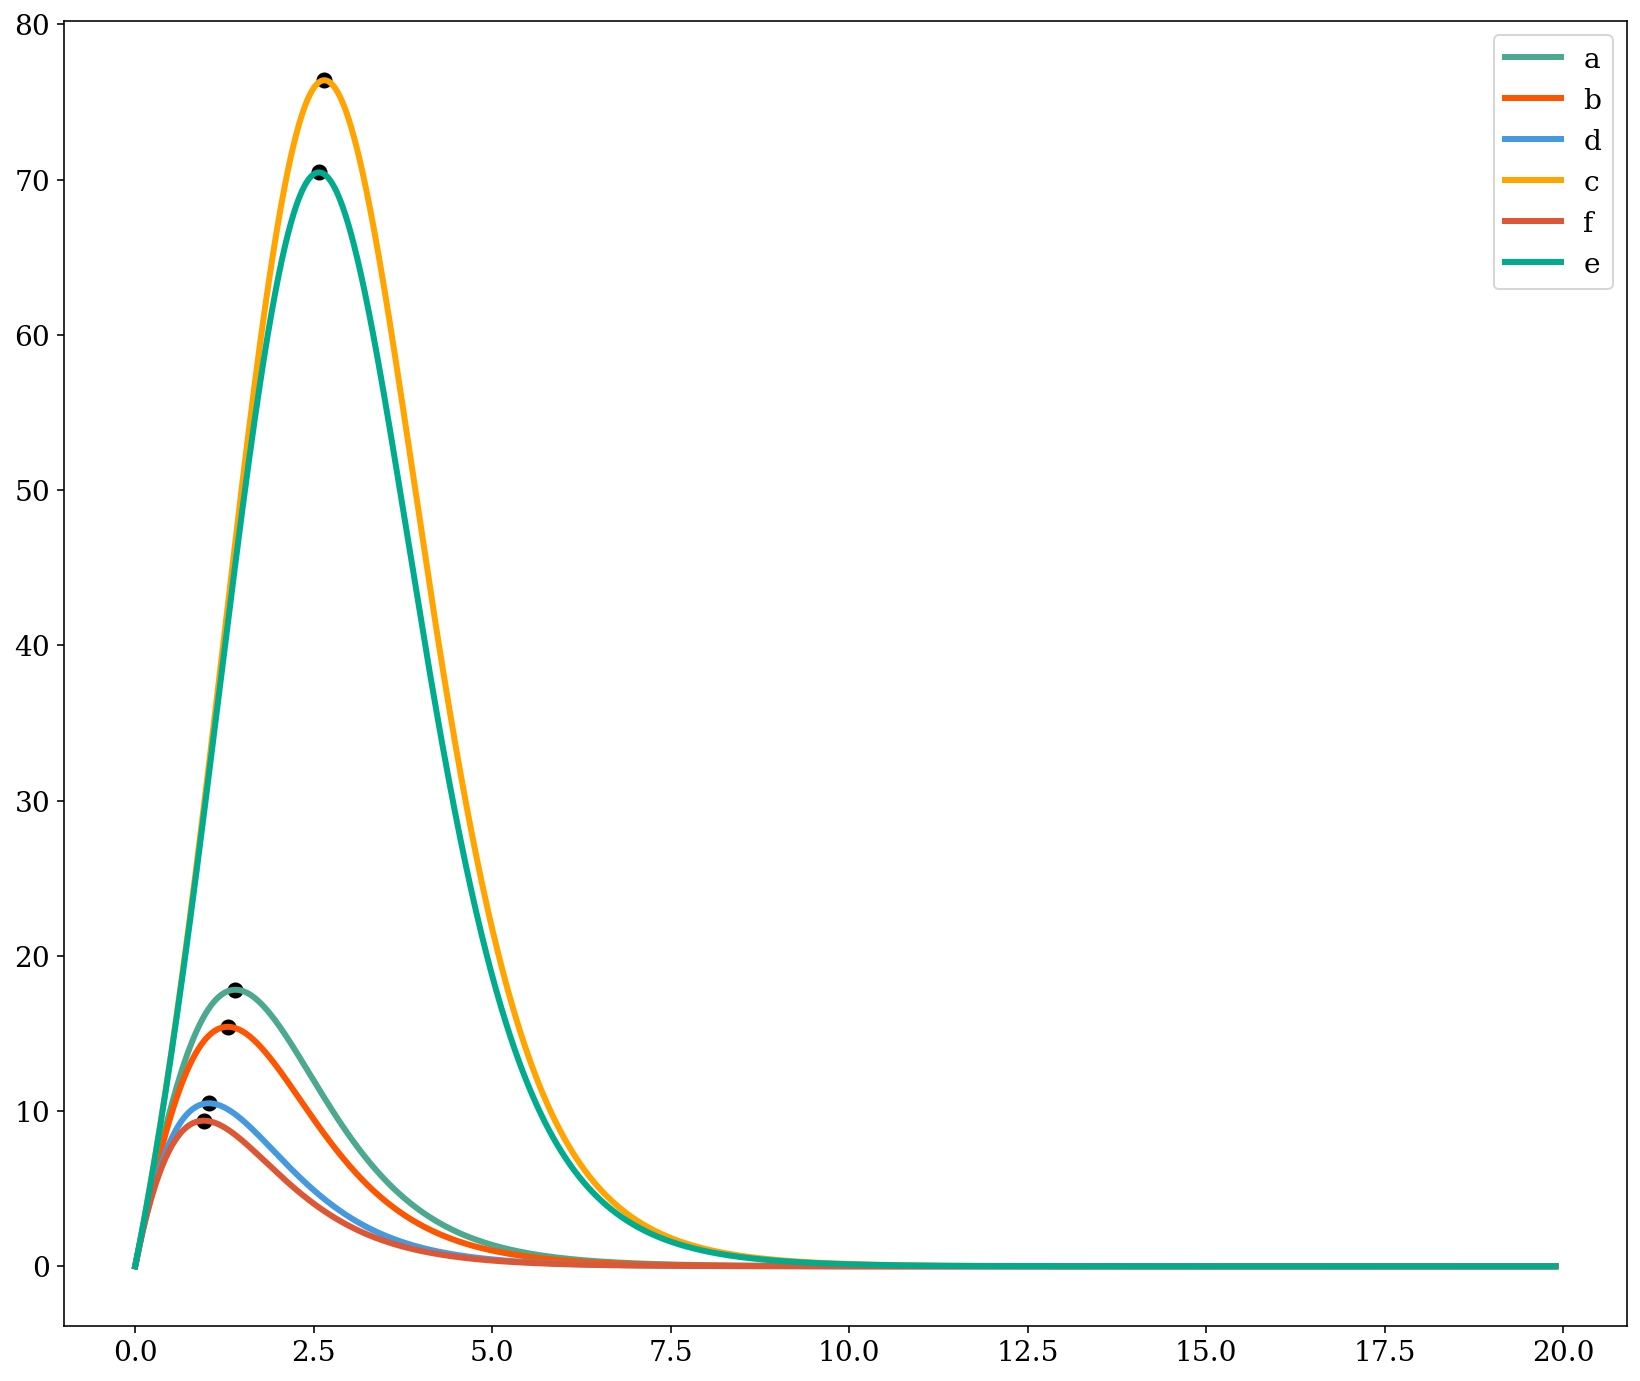

In [53]:
fig, ax = plt.subplots(figsize = (14, 12))
for i in range(num_simulations):
    #print(mega_omegas[i,:])
    #print(param_choices[i])
    #plt.semilogy(mega_affinities[i,:], mega_areas[i,:],label=(omega_labels[i],paramchoice_labels[i]),color=colors[i],linewidth=3)
    plt.plot(mega_affinities[i,:], mega_areas[i,:],label=(paramchoice_labels[i]),color = colors[i],linewidth=3)
plt.legend()
ax.scatter(mega_affinities[np.arange(num_simulations), idx],mega_areas[np.arange(num_simulations), idx],color='black',marker='o',linewidth=2)
plt.show()
fig.savefig('forcearea-1-allparams-redone.pdf', dpi = 900, bbox_inches='tight',facecolor=fig.get_facecolor(), edgecolor='none')

# Multi-run

In [181]:
num_simulations = 5
num_perturbations = 2000
num_params = 6

observable=[3,5,7]
tau_n = np.around(np.arange(0.01,0.3,step=.01), decimals = 2)

mega_affinities = np.zeros((num_simulations,num_perturbations))
mega_areas = np.zeros((num_simulations,num_perturbations))
mega_omegas = np.zeros((num_simulations, num_params))
param_choices = np.zeros((num_simulations,1))

In [182]:
for j in range(num_simulations):
    # arrays for force/area tracking
    affinities = np.zeros(num_perturbations)
    areas = np.zeros(num_perturbations)
    
    # generate equilibrium values
    omegas = log_eqparamsample_3vertex(min_val=-3,max_val=3,num_params=6)
    mega_omegas[j,] = omegas
    
    # set equilibrium values 
    affinities[0] = cycle_affinity_3state(omegas)
    L = np.array([[-(omegas[0]+omegas[4]), omegas[1], omegas[5]], [omegas[0], -(omegas[1]+omegas[2]), omegas[3]], [omegas[4], omegas[2], -(omegas[5]+omegas[3])]])
    
    t, t_rev = NG_III_autocorrelation_analytical(observable,L,tau_n,alpha=1,beta=3)
    areas[0] = steinberg_signature(t, t_rev)
        
    # select random parameter
    param_choice = np.random.choice(np.arange(0,5),size=1)[0]
    param_choices[j] = param_choice

    for i in tqdm(range(1,num_perturbations)):
        omegas[param_choice] = omegas[param_choice]*1.01

        affinities[i] = np.abs(np.log((omegas[0]*omegas[2]*omegas[5])/(omegas[1]*omegas[3]*omegas[4])))

        L = np.array([[-(omegas[0]+omegas[4]), omegas[1], omegas[5]], [omegas[0], -(omegas[1]+omegas[2]), omegas[3]], [omegas[4], omegas[2], -(omegas[5]+omegas[3])]])

        t, t_rev = NG_III_autocorrelation_analytical(observable,L,tau_n,alpha=1,beta=3)

        areas[i] = np.abs(np.trapz(t,dx=0.5)-np.trapz(t_rev,dx=0.5))
    
    mega_affinities[j,] = affinities
    mega_areas[j,] = areas

100%|██████████████████████████████████████| 1999/1999 [00:16<00:00, 121.00it/s]


In [183]:
idx = np.argmax(mega_areas,axis=1)
print(idx)
print(mega_areas[np.arange(num_simulations), idx])
print(mega_affinities[np.arange(num_simulations), idx])

[326 732 519  61 202]
[6.57910361e-01 2.33541114e-03 1.63053443e-03 7.15088049e-06
 3.62946169e-02]
[3.24380786 7.28364218 5.16422171 0.60697018 2.00996683]


In [184]:
omega_labels = [np.around(mega_omegas[i,], decimals=3) for i in range(num_simulations)]

for i in range(len(omega_labels)):
    omega_labels[i] = str(omega_labels[i]).replace('\n', '')
    ' '.join(omega_labels[i].split())

paramchoice_labels = [str(param_choices[i][0]+1) for i in range(num_simulations)]

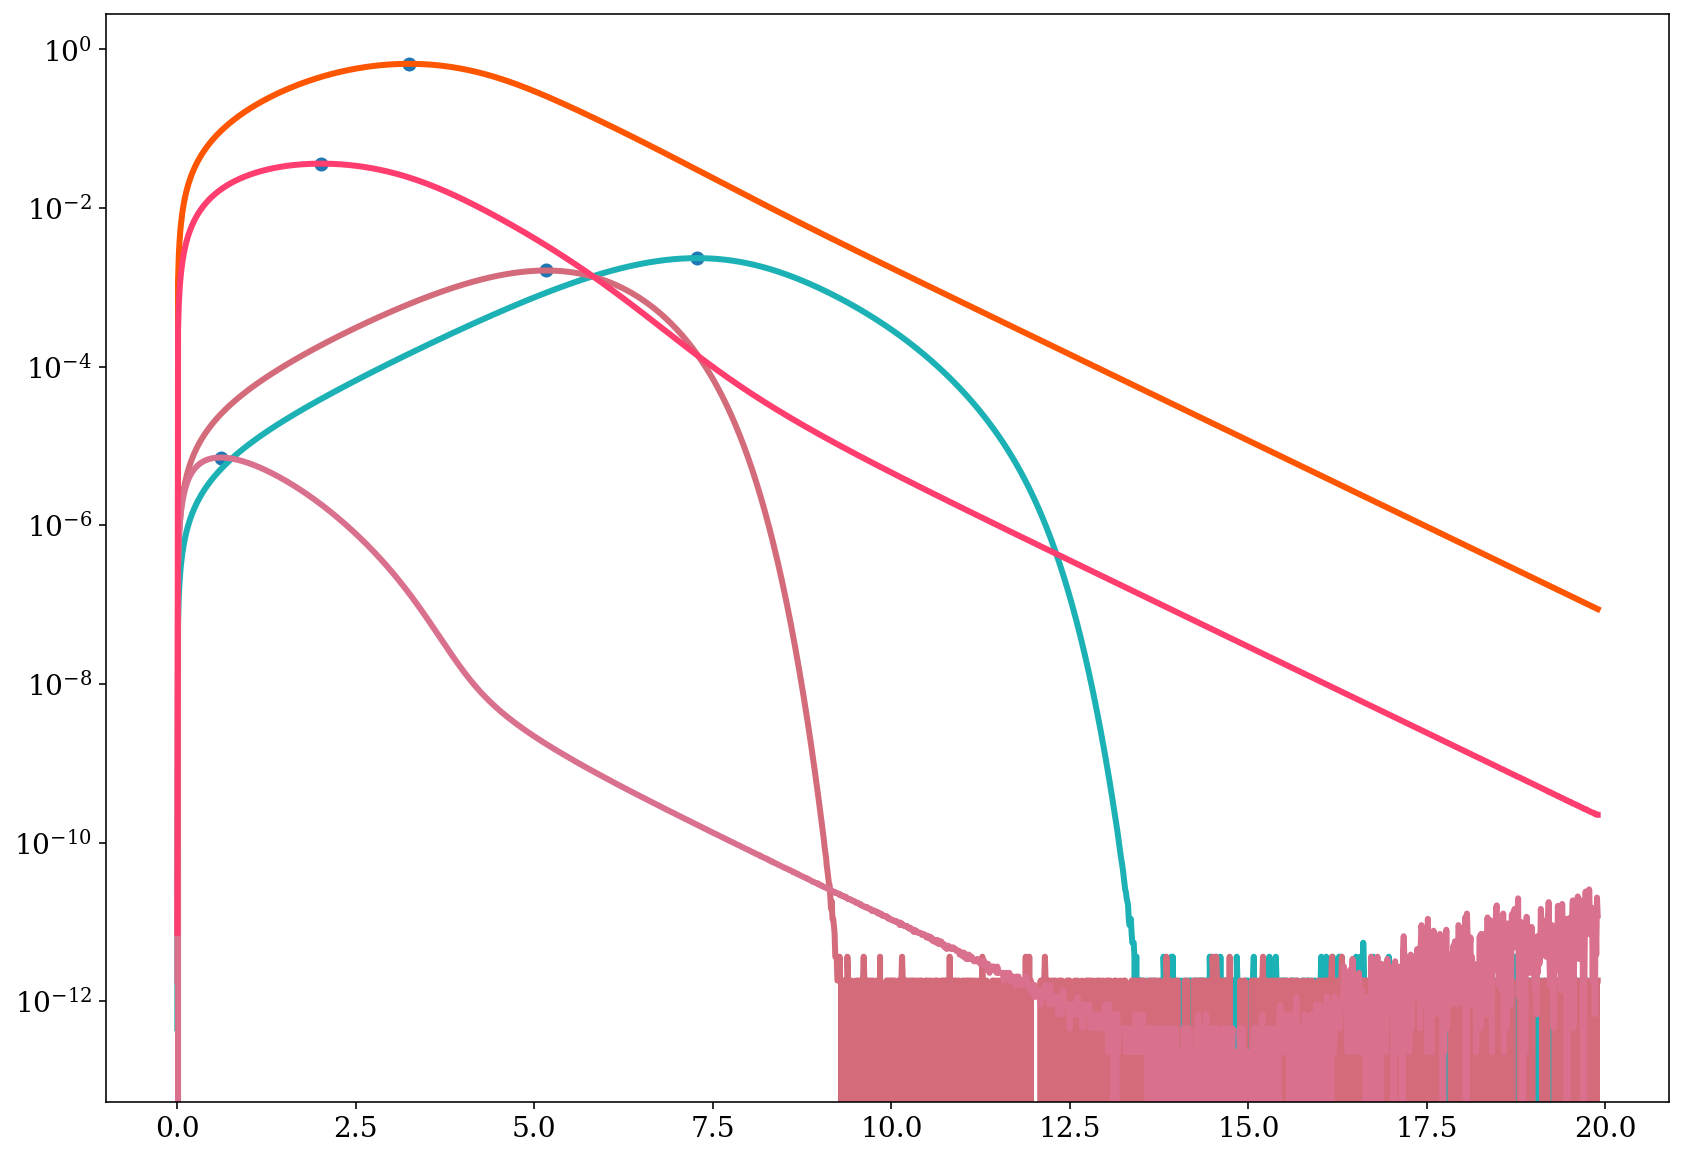

In [187]:
fig, ax = plt.subplots(figsize = (14, 10))
for i in range(num_simulations):
    plt.semilogy(mega_affinities[i,:], mega_areas[i,:],label=(omega_labels[i],paramchoice_labels[i]),color=colors[i],linewidth=3)
#plt.legend()
ax.scatter(mega_affinities[np.arange(num_simulations), idx],mega_areas[np.arange(num_simulations), idx])
plt.show()
#fig.savefig('forcearea-multi-2-log.png', dpi = 900, bbox_inches='tight',facecolor=fig.get_facecolor(), edgecolor='none')

# Automation (writing larger functions)

In [57]:
def autocorrelation_eq_compare(max_val,observable,tau_n):
    """
    Randomly samples parameters that satisfy the cycle condition, and calculates the values of G and G_r,
    the cycle affinity, and the area between G and G_r
    
    Parameters
    ----------
    max_val : scalar
        maximum value of parameter sampling range
    observable : 1D array
        possible values of observable (which is a state function on the Markov process)
    tau_n : 1D array
        range of intervals between values of observable taken by system
    
    Returns
    -------
    omegas : 1D array
        equilibrium values of parameters in Markovian system
    affinity : scalar
        value of the thermodynamic foce of the system
    t : 1D array
        forward autocorrelation function values
    t_rev : 1D array
        reverse autocorrelation function values
    area : scalar
        area between the forward (G) and reverse (G_r) autocorrelation functions
    """
    
    # sample equilibrium parameters
    omegas = eq_param_sample(max_val)
    
    affinity = cycle_affinity_3state(omegas)
    
    # calculate the Laplacian from params
    R = np.array([[0, omegas[0], omegas[4]], [omegas[1], 0, omegas[2]], [omegas[5], omegas[3], 0]])
    L = np.transpose(R) + np.array([[-(omegas[0]+omegas[4]), 0, 0], [0, -(omegas[1]+omegas[2]), 0], [0, 0, -(omegas[5]+omegas[3])]])
    
    # calculate the autocorrelation function values in forward and reverse
    t, t_rev = autocorrelation_analytical(observable,L,tau_n,alpha=1,beta=3)
    
    # calculate the area between them
    area = np.abs(np.trapz(t)-np.trapz(t_rev))
    
    return omegas, affinity, t, t_rev, area

In [64]:
def autocorrelation_noneq_compare(max_val,observable,tau_n):
    """
    Randomly samples parameters that satisfy the cycle condition, and calculates the values of G and G_r,
    the cycle affinity, and the area between G and G_r
    
    Parameters
    ----------
    max_val : scalar
        maximum value of parameter sampling range
    observable : 1D array
        possible values of observable (which is a state function on the Markov process)
    tau_n : 1D array
        range of intervals between values of observable taken by system
    
    Returns
    -------
    omegas : 1D array
        equilibrium values of parameters in Markovian system
    affinity : scalar
        value of the thermodynamic foce of the system
    t : 1D array
        forward autocorrelation function values
    t_rev : 1D array
        reverse autocorrelation function values
    area : scalar
        area between the forward (G) and reverse (G_r) autocorrelation functions
    """
    
    # sample equilibrium parameters
    omegas = noneq_param_sample(max_val)
    
    affinity = cycle_affinity_3state(omegas)
    
    # calculate the Laplacian from params
    R = np.array([[0, omegas[0], omegas[4]], [omegas[1], 0, omegas[2]], [omegas[5], omegas[3], 0]])
    L = np.transpose(R) + np.array([[-(omegas[0]+omegas[4]), 0, 0], [0, -(omegas[1]+omegas[2]), 0], [0, 0, -(omegas[5]+omegas[3])]])
    
    # calculate the autocorrelation function values in forward and reverse
    t, t_rev = autocorrelation_analytical(observable,L,tau_n,alpha=1,beta=3)
    
    # calculate the area between them
    area = np.abs(np.trapz(t)-np.trapz(t_rev))
    
    return omegas, affinity, t, t_rev, area

In [68]:
observable = [3, 5, 7]

tau_n = np.around(np.arange(0.01,.20,step=.0001), decimals = 4)

omegas, affinity, t, t_rev, area = autocorrelation_noneq_compare(10,observable,tau_n)

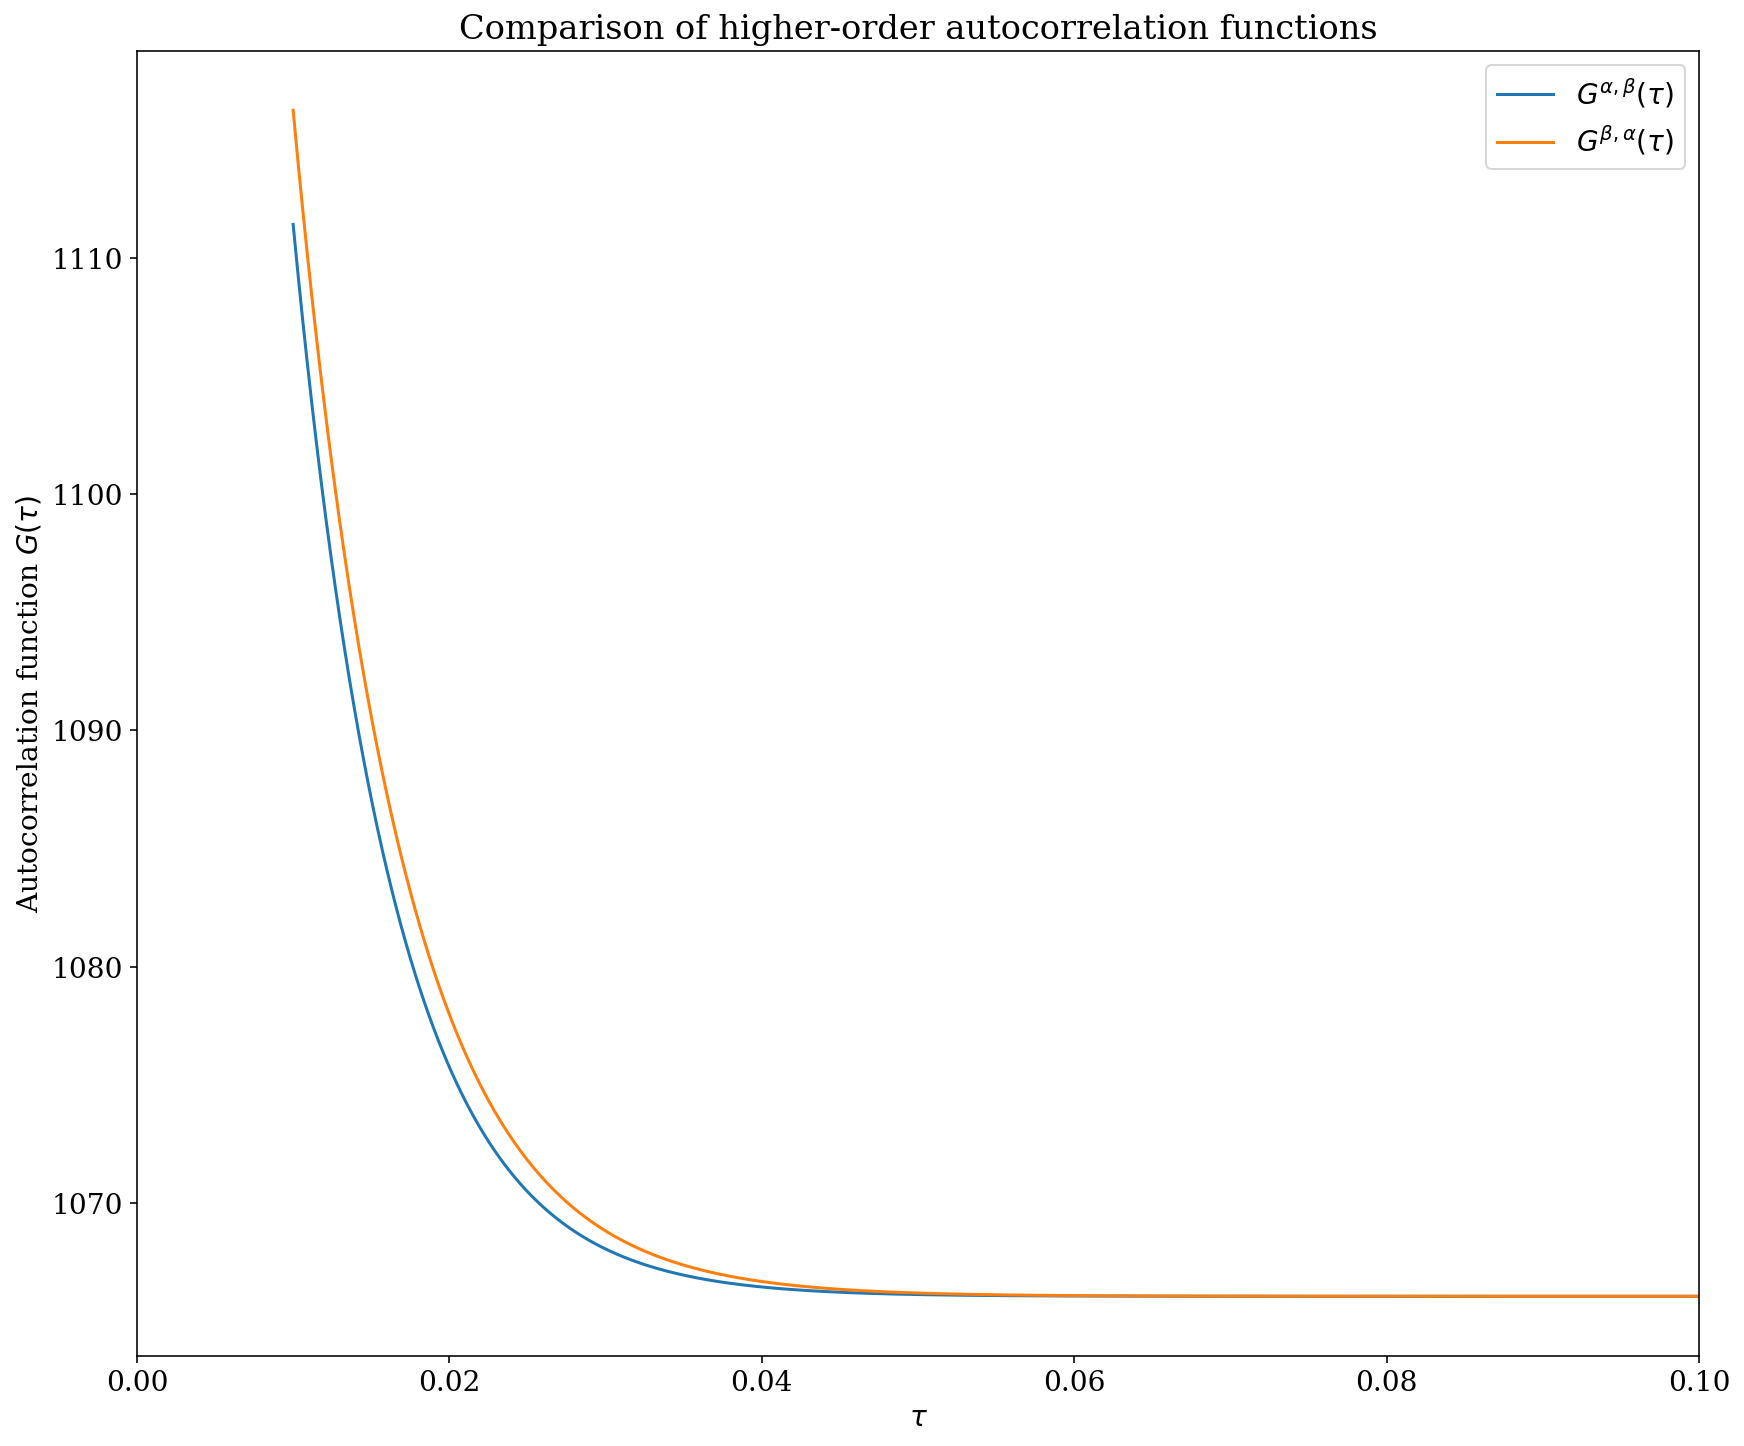

1.7633048260336683
551.9146425160579


In [69]:
fig = plt.figure()
plt.plot(tau_n,t,label=r'$G^{\alpha,\beta}(\tau)$')
plt.plot(tau_n,t_rev,label=r'$G^{\beta,\alpha}(\tau)$')
plt.xlabel(r'$\tau$')
plt.ylabel(r'Autocorrelation function $G(\tau)$')
plt.title(r'Comparison of higher-order autocorrelation functions')
plt.xlim(0,0.1)
plt.legend()
plt.show()
fig.savefig('trial_noneq.png', bbox_inches='tight',facecolor='w')
print(affinity)
print(area)

In [70]:
observable = [3, 5, 7]

tau_n = np.around(np.arange(0.01,.20,step=.0001), decimals = 4)

omegas_eq, affinity_eq, t_eq, t_rev_eq, area_eq = autocorrelation_eq_compare(10,observable,tau_n)

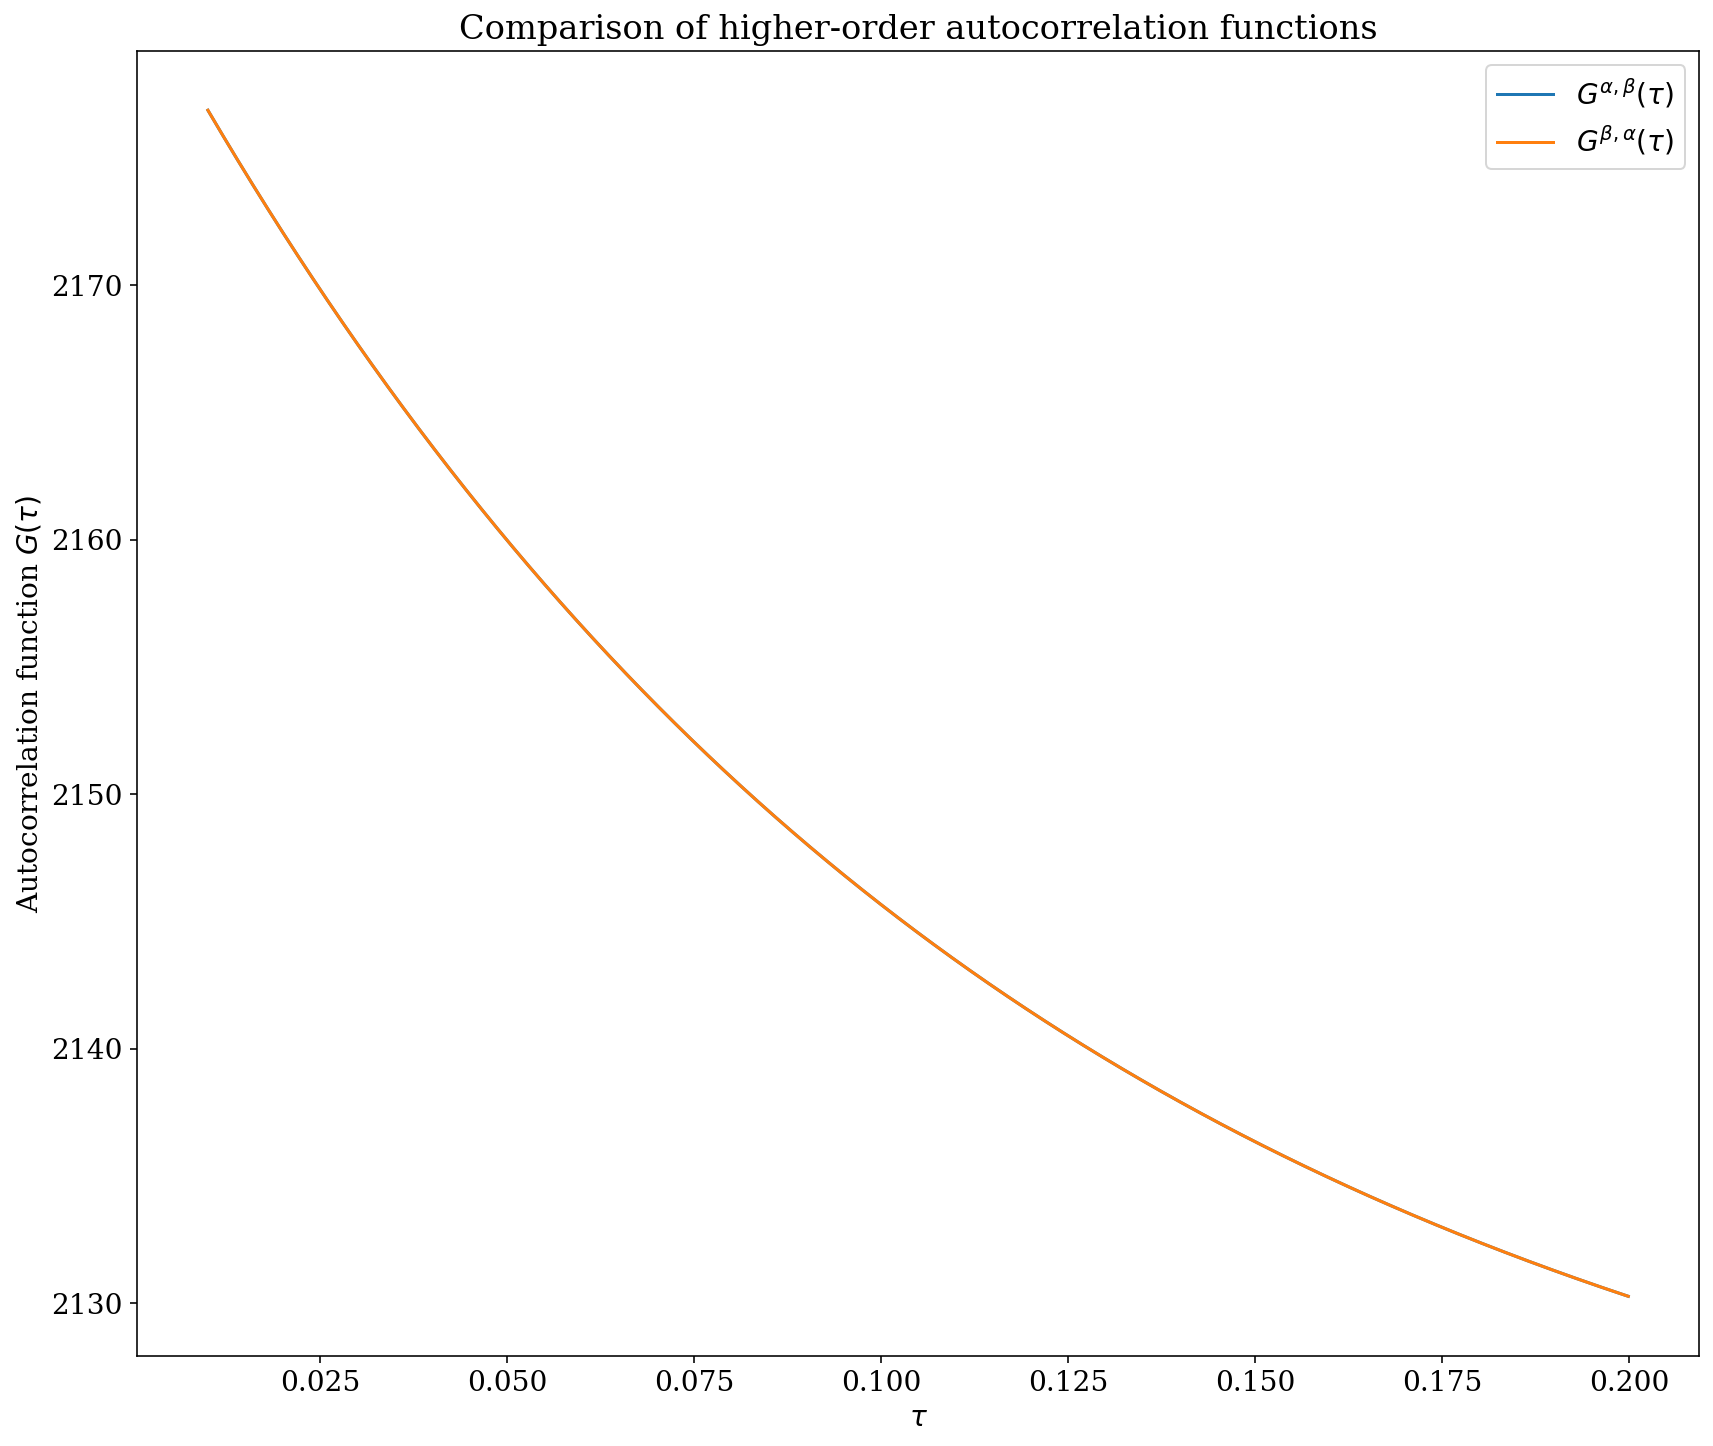

0.0
9.313225746154785e-10


In [71]:
fig = plt.figure()
plt.plot(tau_n,t_eq,label=r'$G^{\alpha,\beta}(\tau)$')
plt.plot(tau_n,t_rev_eq,label=r'$G^{\beta,\alpha}(\tau)$')
plt.xlabel(r'$\tau$')
plt.ylabel(r'Autocorrelation function $G(\tau)$')
plt.title(r'Comparison of higher-order autocorrelation functions')
plt.legend()
plt.show()
fig.savefig('trail_eq.png', bbox_inches='tight',facecolor='w')
print(affinity_eq)
print(area_eq)